# Day 3: Persistent Homology

Today, we will explore persistent homology for a range of datasets and filtrations.

In [53]:
# all imports here
import numpy as np
import gudhi
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import matplotlib.animation as animation
from sklearn import datasets
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from scipy.spatial import Delaunay
from tqdm import tqdm, trange

## Point cloud data

First, let's look at the persistent homology of various point clouds when using the Rips filtration. I have already computed persistence diagrams with respect to the Rips filtration for several of the 2D point clouds we used previously. Please do the same thing for the 3D point cloud data. 

In [54]:
def load_pcd(filename, show=False):
    ''' Loads 2D/3D point cloud data from *.npy files

    Parameters:
        filename: name of *.npy file.
        show: option to visualize point clouds in 3D

    Returns: 
        np.array formatted as [point_1, point_2, ..., point_n]
    
    '''
    array = np.load(filename)
    dim = array.shape[1]
    if show:
        fig = plt.figure()
        if dim == 3:
            ax = fig.add_subplot(projection='3d')
            ax.set_xlim3d(-1, 1)
            ax.set_ylim3d(-1, 1)
            ax.set_zlim3d(-1, 1)
            ax.scatter(array[:, 0],array[:, 1], array[:, 2])
        else:
            ax = fig.add_subplot()
            ax.scatter(array[:, 0], array[:, 1])
    return array 

In [55]:
def complex_visualizer_PCD(points, complex, ax, animation=False):
    ''' Visualizes complex generated from 2D or 3D point cloud data.

    Parameters:
        points: original point cloud data
        complex: simplicial complex formatted as [simplex_1, simplex_2, .... simplex_nn]. 
        Each simplex_i is a list of indices.

    '''
    dim = points.shape[1]

    filtration = complex.get_filtration()
    if dim == 3:
        ax.scatter(points[:, 0], points[:, 1], points[:, 2], s=1, c='k')
    for filtered_value in filtration:
        if filtered_value[1] == 0.0:
            continue
        indices = filtered_value[0]
        sdim = len(indices) - 1
        if sdim > 1:
            alpha=0.3
        else:
            alpha = 1.0
        splex_verts = points[indices]
        color = [(1 - 1/sdim)*0.5, (1 - 1/sdim)*0.5, (1 - 1/sdim)]
        if dim == 2:
            ax.fill(splex_verts[:, 0], splex_verts[:, 1], c=color, alpha=alpha)
        else:
            verts = splex_verts.tolist()
            ax.add_collection3d(Poly3DCollection([verts], color=color, alpha=alpha))
    if animation:
        assert dim == 2
        container = ax.get_children()
        return container
    return ax

In [56]:
import time
def rips_gudhi(points, radius, max_dimension=2, show=False):
    ''' TODO: use Gudhi to create a Rips complex of some fixed radius parameter. 

    Parameters:
        points: original point cloud data
        radius: radius parameter
        max_dimension: maximum dimension of simplices in resulting complex
        show: option to visualize complex 

    Returns:
        Gudhi SimplexTree object

    '''
    cplex = gudhi.RipsComplex(points=points, max_edge_length=radius).create_simplex_tree(max_dimension=max_dimension)
    if show:
        fig = plt.figure()
        if points.shape[1] == 3:
            ax=fig.add_subplot(projection='3d')
        else:
            ax = fig.add_subplot()
        ax = complex_visualizer_PCD(points, cplex, ax)
    return cplex

In [57]:
def plot_persistence_diagram(ax, persistence_points, dimension=0):
    dgm = []
    for pt in persistence_points:
        if pt[0] == dimension:
            dgm.append(pt[1])
    dgm = np.array(dgm)
    ax.scatter(dgm[:, 0], dgm[:, 1])

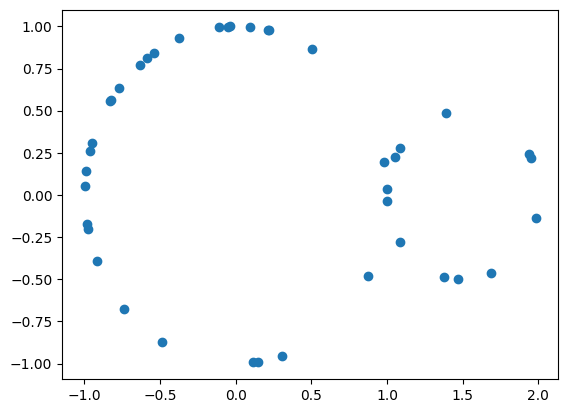

In [58]:
points = load_pcd('/data/sam/msri-data/point-clouds/2D/two-circles.npy', show=True)

<Axes: title={'center': 'Persistence diagram'}, xlabel='Birth', ylabel='Death'>

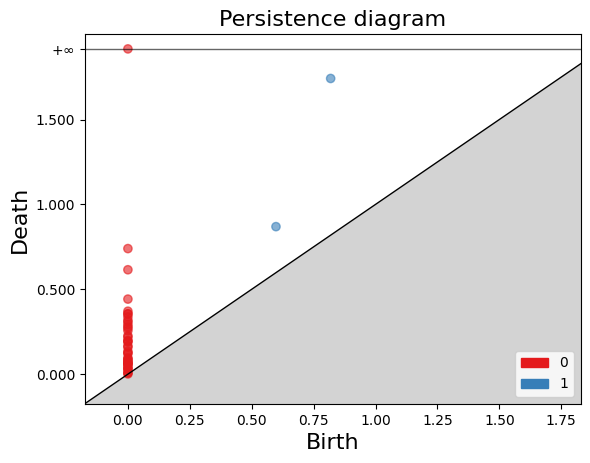

In [59]:
complex = rips_gudhi(points, radius=2.0, max_dimension=2, show=False)
persistence_points = complex.persistence()
gudhi.plot_persistence_diagram(persistence_points)

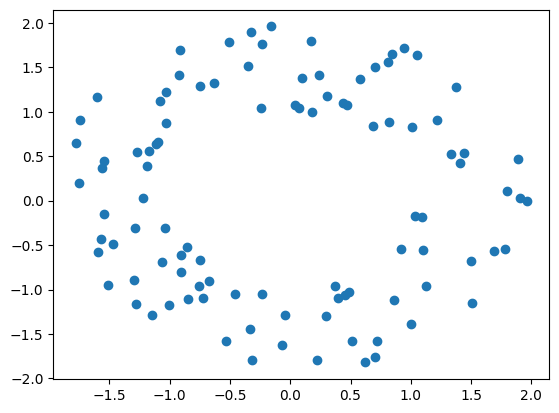

In [60]:
points = load_pcd('/data/sam/msri-data/point-clouds/2D/annulus.npy', show=True)


<Axes: title={'center': 'Persistence diagram'}, xlabel='Birth', ylabel='Death'>

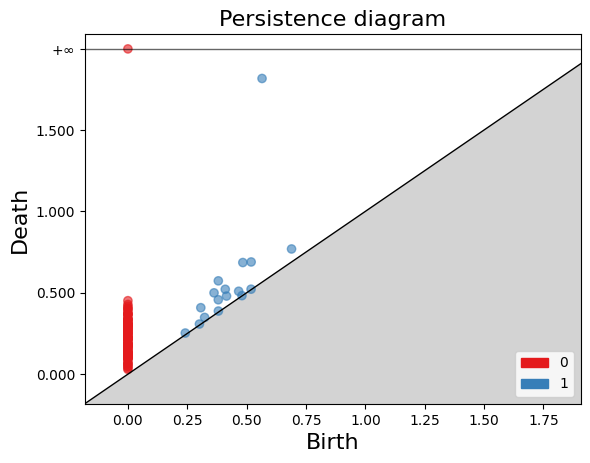

In [61]:
complex = rips_gudhi(points, radius=2.0, max_dimension=2, show=False)
persistence_points = complex.persistence()
gudhi.plot_persistence_diagram(persistence_points)


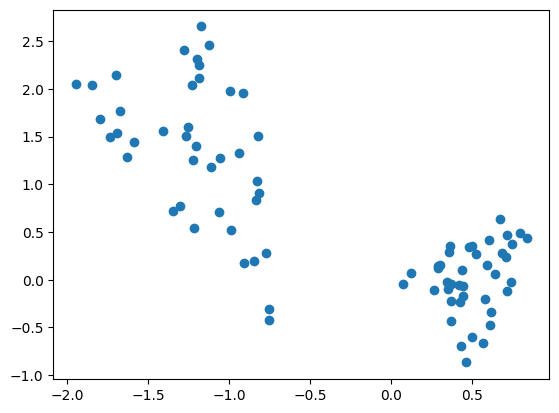

In [62]:
points = load_pcd('/data/sam/msri-data/point-clouds/2D/triangles.npy', show=True)


<Axes: title={'center': 'Persistence diagram'}, xlabel='Birth', ylabel='Death'>

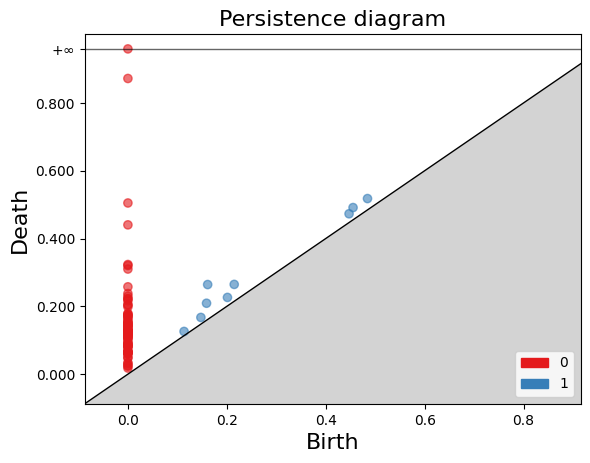

In [65]:
complex = rips_gudhi(points, radius=0.9, max_dimension=2, show=False)
persistence_points = complex.persistence()
gudhi.plot_persistence_diagram(persistence_points)

In [ ]:
# TODO: compute persistent homology/diagrams for 3D point cloud data. 

## Image data

Now, let's work with some image data. You can use the code from day-1 to load images (represented as matrices of pixel values) from toy datasets in already present in the `sklearn` library. 

Use the Ripser library to construct a 0-dimension sublevel set filtration on each image. See the following documentation for more information: [Documentation](https://ripser.scikit-tda.org/en/latest/notebooks/Lower%20Star%20Image%20Filtrations.html). Start out with a simple example (e.g. an image from MNIST) and make sure you understand the resulting persistence diagram. 

In [74]:
import ripser

# TODO: compute persistent homology/diagrams for image data. 